In [1]:
%reload_ext rpy2.ipython
%matplotlib inline
from fbprophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd
import logging
logging.getLogger('fbprophet').setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")

In [2]:
%%R
library("prophet")

In [10]:
dateparse = lambda dates: pd.datetime.strptime(dates,'%Y-%m-%d %H:%M:%S')
p_df = pd.read_csv("/home/sdi/cpu-trend-02.txt",sep = ";",names = ["ds","Symbol","y"],index_col='ds',date_parser=dateparse)
#convert the time column in datetime format

p_df4 = p_df.loc[lambda df: df.Symbol== 'vmy2954']
p_df4 = p_df4.drop('Symbol',axis=1)
p_df4 = p_df4.resample("H").mean()

p_df4 = p_df4.reset_index()
p_df4['ds']= pd.to_datetime(p_df4['ds'])
p_df4 = p_df4.dropna(axis=0, how='any')
p_df4.to_csv('/home/sdi/df_csv')
p_df4

,ds,y
0,2018-02-27 09:00:00,59.965476
1,2018-02-27 10:00:00,56.580183
2,2018-02-27 11:00:00,59.032362
3,2018-02-27 12:00:00,57.383456
4,2018-02-27 13:00:00,58.039448
5,2018-02-27 14:00:00,58.106086
6,2018-02-27 15:00:00,55.462055
7,2018-02-27 16:00:00,57.207034
8,2018-02-27 17:00:00,57.536104
9,2018-02-27 18:00:00,57.045719


# Sliding window thing
## 1. Take size of the file using time window
## 2. Define next size of the window to be considered.
## 3. Train model

In [11]:
print ("length of the file is :", len(p_df4))
p_df4.columns

length of the file is : 50


Index(['ds', 'y'], dtype='object')

Text(0.5,1,'CPU Idle Value Forecasting 3 hours ahead ')

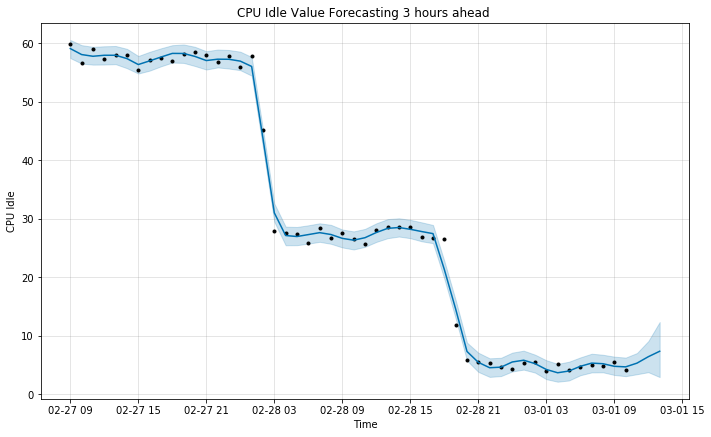

In [12]:
m = Prophet(changepoint_prior_scale = 0.8).fit(p_df4)
period = 3
future = m.make_future_dataframe(periods = period, freq = 'H')

fcst = m.predict(future)
#print (fcst)
#p_df4.tail()
#fcst.tail()


m.plot(fcst,xlabel='Time',ylabel='CPU Idle', uncertainty=True)
%matplotlib inline
m.plot(fcst,xlabel='Time',ylabel='CPU Idle', uncertainty=True)
plt.title('CPU Idle Value Forecasting {} hours ahead '.format(period))
#m.fourier_series(3)

In [8]:
p_df4.tail()

,ds,y
44,2018-03-01 05:00:00,4.251288
45,2018-03-01 06:00:00,4.595413
46,2018-03-01 07:00:00,5.104969
47,2018-03-01 08:00:00,4.936442
48,2018-03-01 09:00:00,5.547642


In [9]:
fcst.tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,daily,daily_lower,daily_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,yhat
47,2018-03-01 08:00:00,6.232085,6.232085,6.232085,3.233729,8.014746,-0.523342,-0.523342,-0.523342,-0.523342,-0.523342,-0.523342,-0.523342,-0.523342,-0.523342,5.708743
48,2018-03-01 09:00:00,6.821017,6.821017,6.821017,3.148726,7.733107,-1.246849,-1.246849,-1.246849,-1.246849,-1.246849,-1.246849,-1.246849,-1.246849,-1.246849,5.574168
49,2018-03-01 10:00:00,7.409948,7.019593,7.696296,3.907353,8.822320,-1.099462,-1.099462,-1.099462,-1.099462,-1.099462,-1.099462,-1.099462,-1.099462,-1.099462,6.310486
50,2018-03-01 11:00:00,7.998880,6.285402,9.406399,4.868763,10.581795,-0.117562,-0.117562,-0.117562,-0.117562,-0.117562,-0.117562,-0.117562,-0.117562,-0.117562,7.881318
51,2018-03-01 12:00:00,8.587812,5.166205,11.638680,5.185627,13.303201,0.890154,0.890154,0.890154,0.890154,0.890154,0.890154,0.890154,0.890154,0.890154,9.477966
